### **Laboratorio 2: Puertas de un solo qubit**  
En este segundo laboratorio del curso **"Computación Cuántica con Qiskit y JupyterLab"**, exploraremos las **puertas cuánticas de un solo qubit**, las cuales permiten manipular el estado de un qubit dentro de un circuito cuántico.  

En el **Laboratorio 1**, aprendimos que un qubit puede estar en un estado arbitrario de la forma:  

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$  

donde $\alpha$ y $\beta$ son **amplitudes de probabilidad** que cumplen la condición de normalización:  

$$
|\alpha|^2 + |\beta|^2 = 1
$$  

Ahora, en este laboratorio aprenderemos **cómo modificar estos estados utilizando puertas cuánticas**. Para ello, debemos comprender cómo funcionan las **transformaciones unitarias** en la computación cuántica.  

---

## **1. Introducción a las puertas cuánticas**  

### **Diferencias entre puertas clásicas y cuánticas**  

En la computación clásica, las **puertas lógicas** operan sobre **bits**, transformando valores de entrada en valores de salida de manera determinista. Algunas de las puertas clásicas más comunes son:  

- **NOT**: Invierte el bit de entrada, cambiando **0 → 1** y **1 → 0**.  
- **AND**: Devuelve **1** si ambas entradas son **1**, y **0** en cualquier otro caso.  
- **OR**: Devuelve **1** si al menos una entrada es **1**, y **0** si ambas son **0**.  

Estas puertas se pueden representar mediante **tablas de verdad**, que muestran la salida para cada posible combinación de entradas.  

Sin embargo, en **computación cuántica**, las puertas cuánticas operan sobre **qubits**, los cuales pueden estar en **superposición** y **entrelazamiento**, lo que introduce propiedades completamente nuevas:  

1. **Transformaciones reversibles**: Todas las puertas cuánticas son **unitarias**, lo que significa que no hay pérdida de información y siempre existe una transformación inversa. En contraste, algunas puertas clásicas (como AND y OR) no son reversibles.  
2. **Actúan sobre estados en superposición**: Mientras que las puertas clásicas solo afectan estados **0 o 1**, las puertas cuánticas pueden modificar qubits en estados **mixtos**, como **$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$**.  
3. **No determinismo**: Debido a la **naturaleza probabilística** de la mecánica cuántica, el resultado de aplicar una puerta cuántica puede depender de la medición, lo que genera distribuciones de probabilidad en lugar de resultados fijos.  

En esencia, las **puertas cuánticas son transformaciones matemáticas** que rotan, reflejan o combinan estados cuánticos en el espacio de Hilbert.  

---

### **Representación matricial de puertas cuánticas**  

En la computación cuántica, cada puerta cuántica se representa mediante **una matriz unitaria de dimensión $2^n \times 2^n$**, donde **$n$** es el número de qubits sobre los que actúa la puerta.  

Para **un solo qubit**, una puerta cuántica es una **matriz $2 \times 2$**, que al actuar sobre el estado de un qubit transforma su vector de estado.  

El estado de un qubit se representa como un vector columna:  

$$
|\psi\rangle = \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
$$  

Una puerta cuántica **$U$** es una matriz **$2 \times 2$**, y su acción sobre un qubit se expresa mediante el **producto matricial**:  

$$
U |\psi\rangle = \begin{bmatrix} U_{00} & U_{01} \\ U_{10} & U_{11} \end{bmatrix} \begin{bmatrix} \alpha \\ \beta \end{bmatrix}
$$  

Para que una matriz **$U$** sea una puerta cuántica válida, debe ser **unitaria**, lo que significa que cumple la condición:  

$$
U^\dagger U = I
$$  

donde **$U^\dagger$** es la matriz conjugada transpuesta de **$U$**, y **$I$** es la matriz identidad.  

Ejemplo: La **puerta X** (equivalente a NOT en computación clásica) se representa como:  

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$  

Si aplicamos **X** a un qubit en **$|0\rangle$**, obtenemos:  

$$
X |0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle
$$  

De manera similar:  

$$
X |1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle
$$  

Esto confirma que la puerta **X** **invierte** los estados **$|0\rangle$ y $|1\rangle$**, tal como la puerta NOT en la computación clásica.  


### **2. Puertas de Pauli**  

Las **puertas de Pauli** son un conjunto fundamental de **puertas cuánticas de un solo qubit**, que se corresponden con las **matrices de Pauli** en la mecánica cuántica. Estas puertas son **X, Y y Z**, y tienen efectos geométricos bien definidos en la **esfera de Bloch**.  

Cada una de estas puertas representa una **rotación de 180°** alrededor de uno de los ejes **$X$**, **$Y$** o **$Z$** en la esfera de Bloch. Matemáticamente, se expresan como **matrices unitarias $2 \times 2$**, lo que garantiza que conservan la normalización del estado del qubit.  

---

## **2.1 Puerta X (NOT cuántico)**
La **puerta X** es el análogo cuántico de la puerta **NOT** en la computación clásica. Su función principal es **intercambiar los estados** $|0\rangle$ y $|1\rangle$, invirtiendo completamente el valor del qubit.  

### **Matriz de la puerta X**  

La puerta X se representa mediante la siguiente matriz unitaria:  

$$
X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}
$$  

Cuando se aplica sobre los estados base, el efecto es el siguiente:  

$$
X |0\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ 1 \end{bmatrix} = |1\rangle
$$  

$$
X |1\rangle = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle
$$  

### **Efecto en la esfera de Bloch**  
La puerta **X** produce una **rotación de 180° alrededor del eje X** en la esfera de Bloch. Esto significa que si un qubit está en **$|0\rangle$** (polo norte de la esfera), tras aplicar X, se moverá a **$|1\rangle$** (polo sur), y viceversa.  

- **Estado inicial**: $|0\rangle$ en **(x=0, y=0, z=1)**.  
- **Después de aplicar X**: El qubit se mueve a **(x=0, y=0, z=-1)**, que corresponde al estado $|1\rangle$.  

Esta puerta es esencial para la manipulación básica de qubits, ya que permite invertir su estado de manera determinista.  

---

## **2.2 Puerta Y**  
La **puerta Y** es otra de las matrices de Pauli y representa una rotación de **180° alrededor del eje Y** en la esfera de Bloch.  

### **Matriz de la puerta Y**  

$$
Y = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix}
$$  

Cuando se aplica sobre los estados base:  

$$
Y |0\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 0 \\ i \end{bmatrix} = i|1\rangle
$$  

$$
Y |1\rangle = \begin{bmatrix} 0 & -i \\ i & 0 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} -i \\ 0 \end{bmatrix} = -i|0\rangle
$$  

### **Efecto en la esfera de Bloch**  
La puerta **Y** rota el estado del qubit **180° en torno al eje Y**. Esto significa que si el qubit está en **$|0\rangle$**, la puerta Y lo moverá hacia **$i|1\rangle$**, y si está en **$|1\rangle$**, lo moverá a **$-i|0\rangle$**.  

En términos geométricos, la puerta **Y** invierte el qubit **cambiando su fase relativa** con un factor **$i$**. Esto la diferencia de la puerta **X**, que intercambia **directamente** $|0\rangle$ y $|1\rangle$ sin agregar una fase.  

---

## **2.3 Puerta Z**  
La **puerta Z** se conoce como la **puerta de fase** y tiene un efecto diferente a las puertas X e Y: en lugar de intercambiar los estados **$|0\rangle$ y $|1\rangle$**, lo que hace es **cambiar la fase del estado $|1\rangle$** sin afectar el estado $|0\rangle$.  

### **Matriz de la puerta Z**  

$$
Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}
$$  

Cuando se aplica sobre los estados base:  

$$
Z |0\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 1 \\ 0 \end{bmatrix} = \begin{bmatrix} 1 \\ 0 \end{bmatrix} = |0\rangle
$$  

$$
Z |1\rangle = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} 0 \\ 1 \end{bmatrix} = \begin{bmatrix} 0 \\ -1 \end{bmatrix} = -|1\rangle
$$  

Aquí vemos que el estado **$|0\rangle$** permanece inalterado, mientras que **$|1\rangle$** adquiere un **factor de fase** **$-1$**.  

### **Efecto en la esfera de Bloch**  
La puerta **Z** **rota el qubit 180° alrededor del eje Z**, lo que significa que **afecta la fase relativa del estado cuántico** sin modificar la probabilidad de medición.  

- Si el qubit estaba en **$|0\rangle$** o **$|1\rangle$**, la puerta Z **no afecta la probabilidad de obtener esos estados** en una medición.  
- Si el qubit está en **superposición**, **la fase relativa cambia**, lo que puede afectar futuras interferencias cuánticas.  

Esto hace que la puerta **Z** sea especialmente importante en circuitos cuánticos donde la manipulación de fase es clave para algoritmos como **Fourier cuántico y teleportación cuántica**.  

---

### **Conclusión**
Las **puertas de Pauli** ($X, Y, Z$) son fundamentales en la computación cuántica, ya que permiten **rotar estados en la esfera de Bloch** y **modificar sus propiedades de fase**.  

- **Puerta X**: Invierte los estados **$|0\rangle$ y $|1\rangle$**, equivalente a un **NOT cuántico**.  
- **Puerta Y**: Realiza una **rotación en torno al eje Y** e introduce un factor de fase **$i$**.  
- **Puerta Z**: No cambia **probabilidades de medición**, pero **modifica la fase del estado $|1\rangle$**.  

Ahora que comprendemos sus efectos **matemáticos y geométricos**, en la siguiente parte **implementaremos estas puertas en Qiskit** y visualizaremos sus efectos en la **esfera de Bloch** y en la **medición de qubits**. 🚀

In [4]:
# Importar módulos principales de Qiskit
from qiskit.circuit import QuantumCircuit
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_bloch_vector, plot_histogram

# Importar librerías adicionales
import numpy as np
import matplotlib.pyplot as plt


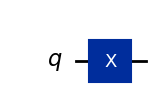

In [6]:
# Crear un circuito cuántico con 1 qubit
qc_x = QuantumCircuit(1)

# Aplicar la puerta X
qc_x.x(0)

# Dibujar el circuito
qc_x.draw('mpl')


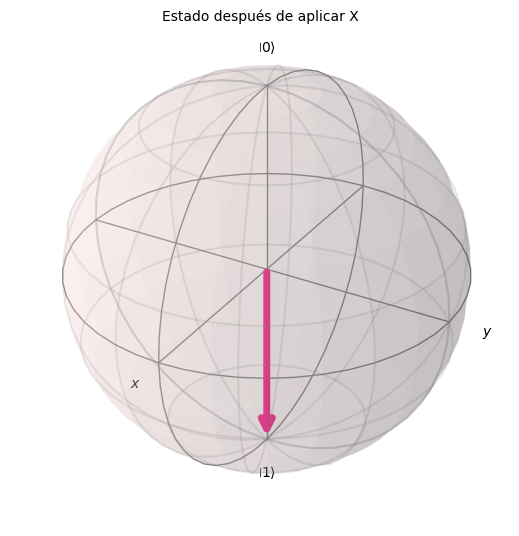

In [8]:
plot_bloch_vector([0, 0, -1], title="Estado después de aplicar X")


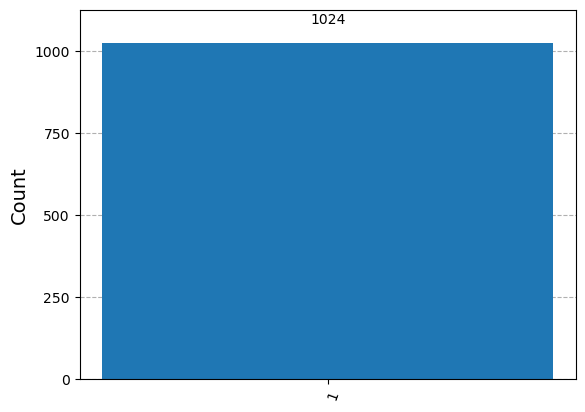

In [10]:
# Agregar una medición al circuito
qc_x.measure_all()

# Configurar el simulador cuántico
simulator = Aer.get_backend('aer_simulator')

# Transpilar y ejecutar el circuito
transpiled_qc_x = transpile(qc_x, simulator)
job_x = simulator.run(transpiled_qc_x, shots=1024)

# Obtener resultados
result_x = job_x.result()
counts_x = result_x.get_counts(qc_x)

# Visualizar el histograma de medición
plot_histogram(counts_x)


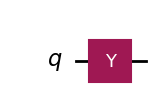

In [12]:
# Crear un circuito cuántico con 1 qubit
qc_y = QuantumCircuit(1)

# Aplicar la puerta Y
qc_y.y(0)

# Dibujar el circuito
qc_y.draw('mpl')

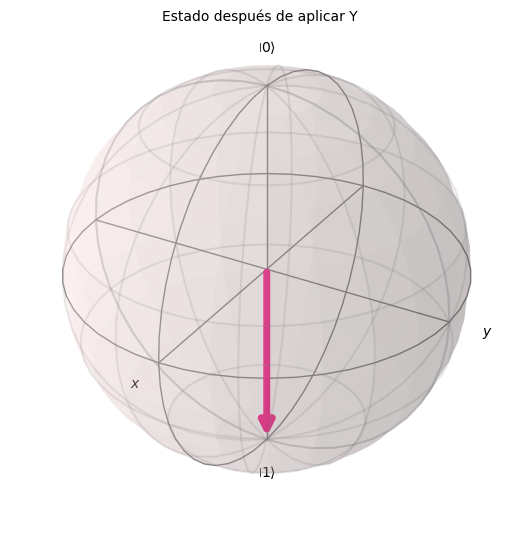

In [14]:
plot_bloch_vector([0, 0, -1], title="Estado después de aplicar Y")

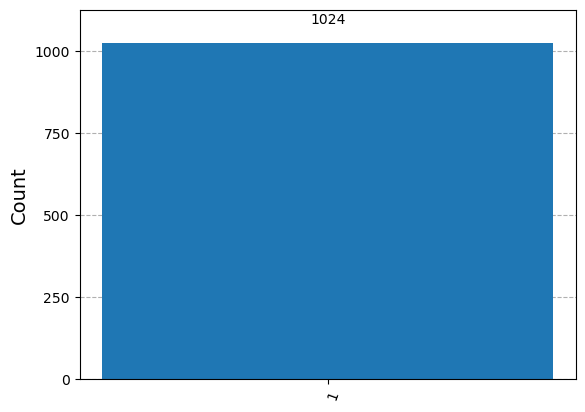

In [16]:
# Agregar una medición al circuito
qc_y.measure_all()

# Transpilar y ejecutar el circuito
transpiled_qc_y = transpile(qc_y, simulator)
job_y = simulator.run(transpiled_qc_y, shots=1024)

# Obtener resultados
result_y = job_y.result()
counts_y = result_y.get_counts(qc_y)

# Visualizar el histograma de medición
plot_histogram(counts_y)

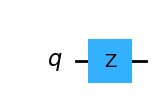

In [18]:
# Crear un circuito cuántico con 1 qubit
qc_z = QuantumCircuit(1)

# Aplicar la puerta Z
qc_z.z(0)

# Dibujar el circuito
qc_z.draw('mpl')

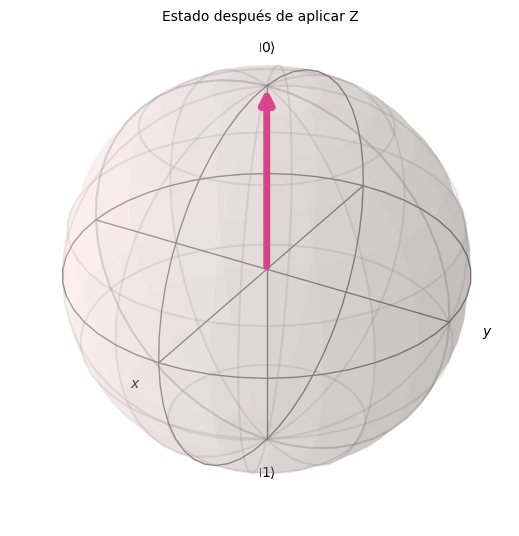

In [20]:
plot_bloch_vector([0, 0, 1], title="Estado después de aplicar Z")

# **3. Bases de medición en computación cuántica**  

En la computación cuántica, la **medición** de un qubit no siempre ocurre en la base estándar **Z**, donde los estados **$|0\rangle$** y **$|1\rangle$** están alineados con el eje **Z** en la esfera de Bloch. En muchos experimentos y algoritmos cuánticos, es fundamental medir en otras bases, como la **base X** y la **base Y**.  

En esta sección exploraremos:  
- **La importancia de las bases de medición** en computación cuántica.  
- **Cómo medir en distintas bases (X, Y, Z) y qué significa cada una**.  
- **Cómo implementar mediciones en distintas bases usando Qiskit**.  

---

## **3.1 Introducción a las bases X, Y y Z**  

### **Base Z (Computacional)**
La **base Z** es la más común y se usa por defecto en los circuitos cuánticos. En esta base, los estados de medición son:

$$
|0\rangle = \begin{bmatrix} 1 \\ 0 \end{bmatrix}, \quad |1\rangle = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

Si medimos un qubit en esta base, el resultado será **$|0\rangle$ o $|1\rangle$**, con probabilidades determinadas por la amplitud del estado antes de la medición.  

Ejemplo:
- Si el qubit está en **$|0\rangle$**, la medición en base Z siempre dará **0**.
- Si el qubit está en **$\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$**, hay un **50% de probabilidad** de medir **0 o 1**.

---

### **Base X (Superposición)**
La **base X** está formada por los siguientes estados:

$$
|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle), \quad |-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)
$$

Estos estados están alineados con el **eje X** en la esfera de Bloch. Para medir en esta base, primero aplicamos una **puerta Hadamard (H)** antes de la medición estándar en **base Z**.  

Ejemplo:
- Si el qubit está en **$|+\rangle$**, hay un **100% de probabilidad** de medir **$|+\rangle$** en la base X.
- Si el qubit está en **$|0\rangle$**, hay un **50% de probabilidad** de obtener **$|+\rangle$ o $|-\rangle$**.

---

### **Base Y (Fase)**
La **base Y** se define con los siguientes estados:

$$
|i+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle), \quad |i-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - i|1\rangle)
$$

Estos estados están alineados con el **eje Y** en la esfera de Bloch. Para medir en esta base, primero aplicamos una **puerta Hadamard (H) seguida de una puerta S** antes de la medición estándar en **base Z**.  

Ejemplo:
- Si el qubit está en **$|i+\rangle$**, hay un **100% de probabilidad** de medir **$|i+\rangle$** en la base Y.
- Si el qubit está en **$|0\rangle$**, hay un **50% de probabilidad** de obtener **$|i+\rangle$ o $|i-\rangle$**.

---

## **3.2 Medición en distintas bases en Qiskit**
Ahora veremos cómo implementar mediciones en **diferentes bases** usando **Qiskit**.

### **Medición en la base Z (Computacional)**

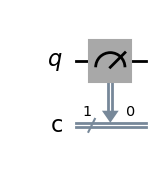

In [31]:
# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc_z = QuantumCircuit(1, 1)

# Medición estándar en base Z
qc_z.measure(0, 0)

# Dibujar el circuito
qc_z.draw('mpl')

🔹 **Explicación**:  
- La medición en **base Z** es la medición por defecto en Qiskit.  
- No requiere puertas adicionales antes de la medición.  

### **Medición en la base X**
Para medir en la **base X**, aplicamos una **puerta Hadamard (H)** antes de la medición en **base Z**:



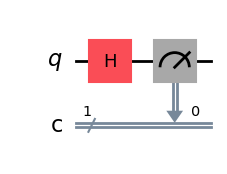

In [34]:
# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc_x = QuantumCircuit(1, 1)

# Aplicar la puerta Hadamard
qc_x.h(0)

# Medir en base Z (pero equivalente a medir en base X)
qc_x.measure(0, 0)

# Dibujar el circuito
qc_x.draw('mpl')

🔹 **Explicación**:  
- La **puerta Hadamard (H)** transforma los estados **$|+\rangle$ y $|-\rangle$** en **$|0\rangle$ y $|1\rangle$**, respectivamente.  
- Luego, la medición estándar en **base Z** nos da los resultados en **base X**.  

---

### **Medición en la base Y**
Para medir en la **base Y**, aplicamos una **puerta Hadamard (H) seguida de una puerta S** antes de la medición en **base Z**:

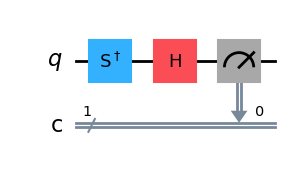

In [37]:
# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc_y = QuantumCircuit(1, 1)

# Aplicar la puerta Hadamard y la puerta S† (S dagger)
qc_y.sdg(0)
qc_y.h(0)

# Medir en base Z (pero equivalente a medir en base Y)
qc_y.measure(0, 0)

# Dibujar el circuito
qc_y.draw('mpl')

🔹 **Explicación**:  
- La **puerta Hadamard (H)** y la **puerta S† (S dagger)** convierten los estados **$|i+\rangle$ y $|i-\rangle$** en **$|0\rangle$ y $|1\rangle$**, respectivamente.  
- Luego, la medición estándar en **base Z** nos da los resultados en **base Y**.  

---

## **3.3 Comparación de resultados en simulador**
Ahora ejecutaremos cada circuito en el **simulador cuántico** y analizaremos los resultados.

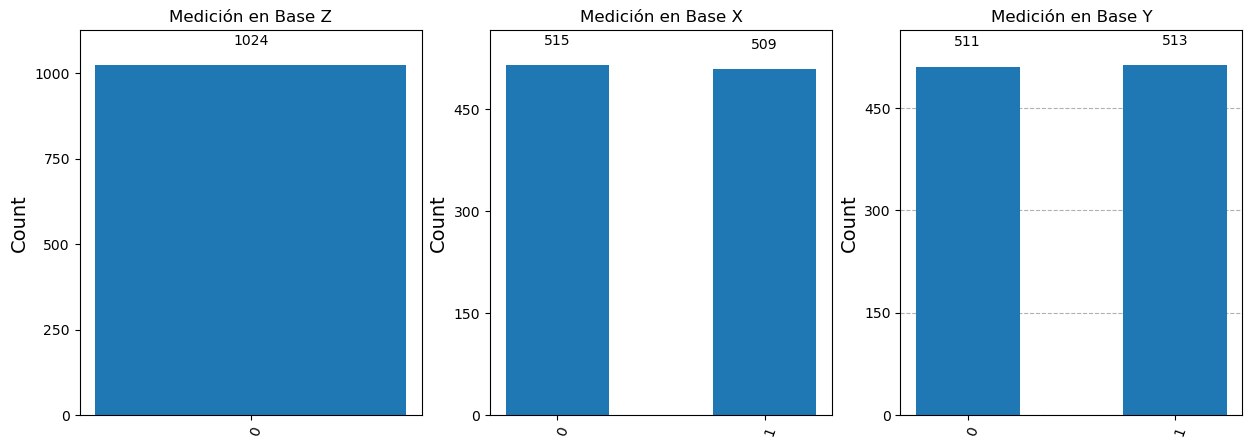

In [66]:
# Configurar el simulador cuántico
simulator = Aer.get_backend('aer_simulator')

# Ejecutar la medición en base Z
transpiled_qc_z = transpile(qc_z, simulator)
job_z = simulator.run(transpiled_qc_z, shots=1024)
result_z = job_z.result()
counts_z = result_z.get_counts(qc_z)

# Ejecutar la medición en base X
transpiled_qc_x = transpile(qc_x, simulator)
job_x = simulator.run(transpiled_qc_x, shots=1024)
result_x = job_x.result()
counts_x = result_x.get_counts(qc_x)

# Ejecutar la medición en base Y
transpiled_qc_y = transpile(qc_y, simulator)
job_y = simulator.run(transpiled_qc_y, shots=1024)
result_y = job_y.result()
counts_y = result_y.get_counts(qc_y)

# Visualizar histogramas
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# Histograma para la medición en la base Z
plot_histogram(counts_z, ax=axes[0])
axes[0].set_title("Medición en Base Z")

# Histograma para la medición en la base X
plot_histogram(counts_x, ax=axes[1])
axes[1].set_title("Medición en Base X")

# Histograma para la medición en la base Y
plot_histogram(counts_y, ax=axes[2])
axes[2].set_title("Medición en Base Y")

plt.show()


🔹 **Interpretación de resultados**:  
- En **base Z**, veremos **$|0\rangle$** ya que iniciamos en ese estado.  
- En **base X**, veremos **$|+\rangle$ y $|-\rangle$** con probabilidades similares.  
- En **base Y**, observaremos resultados en **$|i+\rangle$ y $|i-\rangle$**, lo que refleja la fase cuántica.  


# **4. Puerta de Hadamard (H)**  

La **puerta de Hadamard (H)** es una de las puertas cuánticas más fundamentales, ya que permite crear **superposición cuántica**, un principio clave en la computación cuántica. En esta sección exploraremos:  

1️⃣ **El papel de la puerta Hadamard en la computación cuántica**.  
2️⃣ **Cómo crea estados en superposición**.  
3️⃣ **Cómo implementarla en Qiskit y visualizar su efecto**.  

---

## **4.1 La puerta Hadamard**  

En computación clásica, un bit solo puede estar en un estado **0 o 1**. Sin embargo, en computación cuántica, los qubits pueden estar en una **superposición de ambos estados al mismo tiempo**. La **puerta Hadamard (H)** es la clave para generar esta superposición, transformando los estados base **$|0\rangle$ y $|1\rangle$** en combinaciones equilibradas de ambos.  

### **Matriz de la puerta Hadamard**  
Matemáticamente, la puerta Hadamard se representa como la siguiente matriz unitaria:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix} 
1 & 1 \\ 
1 & -1 
\end{bmatrix}
$$  

Cuando se aplica a los estados base, produce los siguientes resultados:

- **Aplicación en $|0\rangle$**:
  
  $$
  H |0\rangle = \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) = |+\rangle
  $$

- **Aplicación en $|1\rangle$**:

  $$
  H |1\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) = |-\rangle
  $$

Estos estados **$|+\rangle$ y $|-\rangle$** son estados en **superposición**, donde la medición tiene **50% de probabilidad de dar $|0\rangle$ y 50% de probabilidad de dar $|1\rangle$**.

---

## **4.2 Creación de estados superpuestos con la puerta Hadamard**  

La **superposición cuántica** es esencial en algoritmos cuánticos como **Grover** y **Deutsch-Jozsa**, donde se requiere explorar múltiples soluciones simultáneamente.  

La puerta **H** transforma un qubit de un estado clásico **determinista** a un estado **probabilístico**, permitiendo que un solo qubit represente **ambos valores (0 y 1) al mismo tiempo**.  

🔹 **Ejemplo:**  

Si un qubit **comienza en $|0\rangle$** y aplicamos Hadamard, su estado se convierte en **$|+\rangle$**, lo que significa que:  

- **Si lo medimos**, hay un **50% de probabilidad de obtener $|0\rangle$**  
- **Y un 50% de probabilidad de obtener $|1\rangle$**  

Esta es la base de la **paralelización cuántica**, donde múltiples qubits en superposición pueden **representar múltiples estados al mismo tiempo**.

---

## **4.3 Implementación en Qiskit**  

Ahora aplicaremos la puerta **Hadamard (H)** en un circuito cuántico y observaremos su efecto en la esfera de Bloch y en las mediciones.


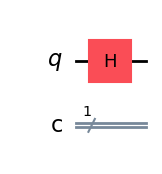

In [71]:
# Crear un circuito cuántico con 1 qubit
qc_h = QuantumCircuit(1, 1)

# Aplicar la puerta Hadamard
qc_h.h(0)

# Dibujar el circuito
qc_h.draw('mpl')

🔹 **Explicación**:  
- Creamos un **circuito cuántico con 1 qubit**.  
- Aplicamos la **puerta Hadamard** para poner el qubit en **superposición**.  

---

### **4.3.2 Visualización del qubit en la esfera de Bloch**  
Ahora visualizamos el efecto de la puerta **Hadamard** en la esfera de Bloch.


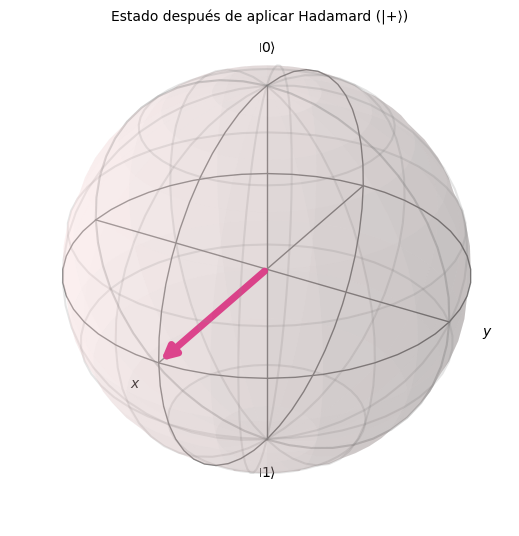

In [76]:
# Representación en la esfera de Bloch después de aplicar Hadamard
plot_bloch_vector([1, 0, 0], title="Estado después de aplicar Hadamard (|+⟩)")

🔹 **Interpretación**:  
- El qubit **se movió del eje Z al eje X**, lo que representa el estado **$|+\rangle$**.  
- Está en **superposición**, lo que significa que **no tiene un valor fijo hasta ser medido**.  

---

### **4.3.3 Medición del qubit en la base Z**
Ahora medimos el qubit después de aplicar **Hadamard** y analizamos los resultados.


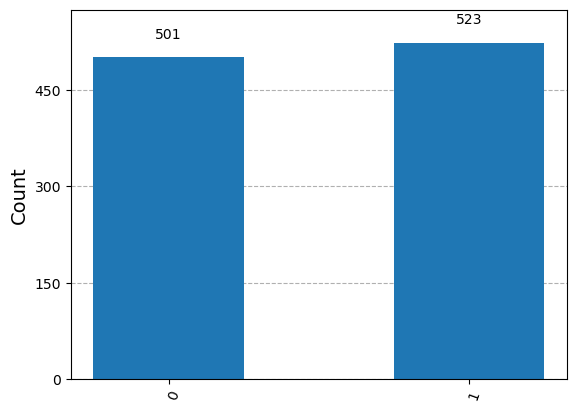

In [81]:
# Agregar una medición
qc_h.measure(0, 0)

# Configurar el simulador cuántico
simulator = Aer.get_backend('aer_simulator')

# Transpilar y ejecutar el circuito
transpiled_qc_h = transpile(qc_h, simulator)
job_h = simulator.run(transpiled_qc_h, shots=1024)

# Obtener los resultados
result_h = job_h.result()
counts_h = result_h.get_counts(qc_h)

# Visualizar el histograma de medición
plot_histogram(counts_h)


🔹 **Resultados esperados**:
- **50% de probabilidades de medir $|0\rangle$**.  
- **50% de probabilidades de medir $|1\rangle$**.  

Este resultado confirma que **el qubit estaba en superposición antes de la medición**.

---

## **📌 Conclusión**
✅ La **puerta Hadamard (H)** genera **superposición cuántica**, lo que permite que un qubit tenga **50% de probabilidad de ser 0 y 50% de ser 1**.  
✅ En la **esfera de Bloch**, mueve el qubit **del eje Z al eje X**, representando el estado **$|+\rangle$**.  
✅ Cuando **medimos el qubit en la base Z**, obtenemos **resultados aleatorios**, lo que confirma la superposición.  

# **5. Puertas de fase y rotaciones en computación cuántica**  

En esta última sección del laboratorio, exploraremos un conjunto fundamental de operaciones cuánticas:  

1. **Las puertas de fase (S y T)** y cómo modifican la fase de un qubit.  
2. **La puerta U**, que permite representar cualquier operación sobre un solo qubit.  
3. **Las rotaciones cuánticas ($R_x, R_y, R_z$)** y sus efectos geométricos en la esfera de Bloch.  

Estas puertas son esenciales para el **control preciso de los qubits**, ya que permiten modificar sus **fases y orientaciones** dentro del espacio cuántico.  

---

## **5.1 Puertas de fase: S y T**  

### **¿Qué es la fase en computación cuántica?**  
En mecánica cuántica, los qubits no solo tienen **magnitudes**, sino también **fases relativas**. Estas fases no pueden ser medidas directamente, pero **afectan la interferencia entre estados cuánticos**, lo cual es crucial para algoritmos como **Fourier cuántico y Shor**.  

Las **puertas S y T** aplican **rotaciones alrededor del eje Z**, modificando la fase relativa de un qubit **sin cambiar su magnitud**.  

### **Puerta S (π/2 en el eje Z)**  
La **puerta S** (también llamada **Phase Gate**) rota el estado **$|1\rangle$** en **90°** en torno al eje **Z** de la esfera de Bloch, introduciendo una fase de **$i$** en el estado $|1\rangle$.

**Matriz de la puerta S:**
$$
S = \begin{bmatrix} 
1 & 0 \\ 
0 & i 
\end{bmatrix}
$$

- **$S |0\rangle = |0\rangle$** (sin cambio en $|0\rangle$).  
- **$S |1\rangle = i |1\rangle$** (añade un factor de fase $i$).  

🔹 **Efecto:** No cambia la probabilidad de medición, pero **altera la interferencia** en circuitos más complejos.  

---

### **Puerta T (π/4 en el eje Z)**  
La **puerta T** es similar a la puerta S, pero en lugar de aplicar una rotación de **90°**, aplica una rotación de **45°** en torno al eje Z.

**Matriz de la puerta T:**
$$
T = \begin{bmatrix} 
1 & 0 \\ 
0 & e^{i\pi/4} 
\end{bmatrix}
$$

- **$T |0\rangle = |0\rangle$**  
- **$T |1\rangle = e^{i\pi/4} |1\rangle$**  

🔹 **Efecto:** Introduce una fase de **$e^{i\pi/4}$** en el estado **$|1\rangle$**, permitiendo rotaciones más finas en algoritmos de corrección de errores y simulaciones cuánticas.

---

## **5.2 Puerta U: Generalización de todas las puertas de un solo qubit**  

La **puerta U** es la operación más general para un **qubit único**. Permite representar **cualquier transformación unitaria en un solo qubit** mediante **tres parámetros $(\theta, \phi, \lambda)$**, que definen rotaciones en la esfera de Bloch.

**Matriz de la puerta U:**
$$
U(\theta, \phi, \lambda) =
\begin{bmatrix} 
\cos(\theta/2) & -e^{i\lambda} \sin(\theta/2) \\ 
e^{i\phi} \sin(\theta/2) & e^{i(\phi+\lambda)} \cos(\theta/2) 
\end{bmatrix}
$$

### **Interpretación de los parámetros**:
- **$\theta$**: Controla la rotación en el eje **X-Y** (afecta la superposición).  
- **$\phi$ y $\lambda$**: Introducen fases relativas en los estados **$|0\rangle$ y $|1\rangle$**.  

Ejemplos:
- **$U(\pi, 0, \pi) = X$** (equivalente a la puerta X).  
- **$U(\pi/2, 0, 0) = H$** (equivalente a la puerta Hadamard).  
- **$U(0, 0, \pi/2) = S$** (equivalente a la puerta S).  

🔹 **Importancia:**  
La puerta **U** es clave en **hardware cuántico**, ya que la mayoría de los dispositivos implementan operaciones de qubits usando variaciones de **U**.

---

## **5.3 Rotaciones cuánticas: $R_x, R_y, R_z$**  

Las **rotaciones cuánticas** permiten girar un qubit alrededor de los ejes X, Y y Z en la **esfera de Bloch**. Estas puertas se representan con **una rotación de un ángulo arbitrario $\theta$**.

---

### **Rotación en el eje X: $R_x(\theta)$**  
La puerta **$R_x$** rota el qubit **$\theta$ radianes** alrededor del eje X de la esfera de Bloch.  

**Matriz de $R_x(\theta)$:**
$$
R_x(\theta) = 
\begin{bmatrix} 
\cos(\theta/2) & -i\sin(\theta/2) \\ 
-i\sin(\theta/2) & \cos(\theta/2) 
\end{bmatrix}
$$  

Ejemplo:
- **$R_x(\pi) = X$** (la puerta X es una rotación de 180° en el eje X).  

🔹 **Efecto en la esfera de Bloch**: Rota el qubit desde **$|0\rangle$ hacia $|1\rangle$** y viceversa.

---

### **Rotación en el eje Y: $R_y(\theta)$**  
La puerta **$R_y$** rota el qubit **$\theta$ radianes** alrededor del eje Y de la esfera de Bloch.  

**Matriz de $R_y(\theta)$:**
$$
R_y(\theta) = 
\begin{bmatrix} 
\cos(\theta/2) & -\sin(\theta/2) \\ 
\sin(\theta/2) & \cos(\theta/2) 
\end{bmatrix}
$$  

Ejemplo:
- **$R_y(\pi)$** transforma **$|0\rangle$ en $|1\rangle$**, pero sin introducir una fase imaginaria como $X$.  

🔹 **Efecto en la esfera de Bloch**: Rota el qubit en el **plano X-Z**, manteniendo la fase real.

---

### **Rotación en el eje Z: $R_z(\theta)$**  
La puerta **$R_z$** rota el qubit **$\theta$ radianes** alrededor del eje Z de la esfera de Bloch.  

**Matriz de $R_z(\theta)$:**
$$
R_z(\theta) = 
\begin{bmatrix} 
e^{-i\theta/2} & 0 \\ 
0 & e^{i\theta/2} 
\end{bmatrix}
$$  

Ejemplo:
- **$R_z(\pi/2) = S$** (la puerta S es una rotación de 90° en Z).  
- **$R_z(\pi/4) = T$** (la puerta T es una rotación de 45° en Z).  

🔹 **Efecto en la esfera de Bloch**:  
- No cambia la probabilidad de medición.  
- Modifica **la fase relativa** del qubit, lo que afecta la interferencia cuántica.



Ahora implementaremos en **Qiskit** todas las puertas de **fase y rotación**, observando sus efectos en la **esfera de Bloch** y en las mediciones de qubits.

## **1. Implementación de las puertas de fase (S y T)**  

Las puertas **S y T** modifican la **fase del qubit**, lo que no afecta la probabilidad de medición en base Z, pero sí es crucial en interferencia cuántica.

### **1.1 Aplicando la puerta S**

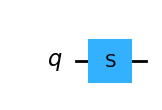

In [95]:
# Crear un circuito cuántico con 1 qubit
qc_s = QuantumCircuit(1)

# Aplicar la puerta S
qc_s.s(0)

# Dibujar el circuito
qc_s.draw('mpl')

### **2.2 Aplicando la puerta T**

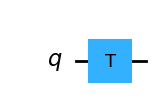

In [100]:
# Crear un circuito cuántico con 1 qubit
qc_t = QuantumCircuit(1)

# Aplicar la puerta T
qc_t.t(0)

# Dibujar el circuito
qc_t.draw('mpl')

## **3. Implementación de la Puerta U**  

La puerta **U** es la más general y permite aplicar cualquier transformación en un qubit.

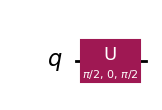

In [105]:
# Crear un circuito cuántico con 1 qubit
qc_u = QuantumCircuit(1)

# Aplicar la puerta U con parámetros arbitrarios (ejemplo: θ = π/2, ϕ = 0, λ = π/2)
qc_u.u(np.pi/2, 0, np.pi/2, 0)

# Dibujar el circuito
qc_u.draw('mpl')


## **4. Implementación de las Rotaciones $R_x, R_y, R_z$**  

Las rotaciones permiten girar un qubit alrededor de los **ejes X, Y y Z** de la esfera de Bloch.

### **4.1 Rotación en el eje X: $R_x$**

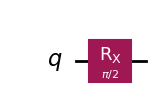

In [110]:
# Crear un circuito cuántico con 1 qubit
qc_rx = QuantumCircuit(1)

# Aplicar una rotación de π/2 en el eje X
qc_rx.rx(np.pi/2, 0)

# Dibujar el circuito
qc_rx.draw('mpl')

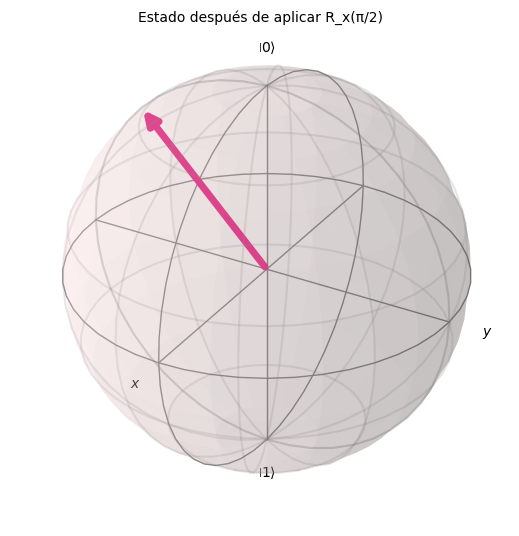

In [112]:
plot_bloch_vector([0, -np.sin(np.pi/4), np.cos(np.pi/4)], title="Estado después de aplicar R_x(π/2)")

### **4.2 Rotación en el eje Y: $R_y$**

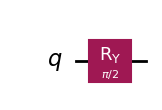

In [115]:
# Crear un circuito cuántico con 1 qubit
qc_ry = QuantumCircuit(1)

# Aplicar una rotación de π/2 en el eje Y
qc_ry.ry(np.pi/2, 0)

# Dibujar el circuito
qc_ry.draw('mpl')

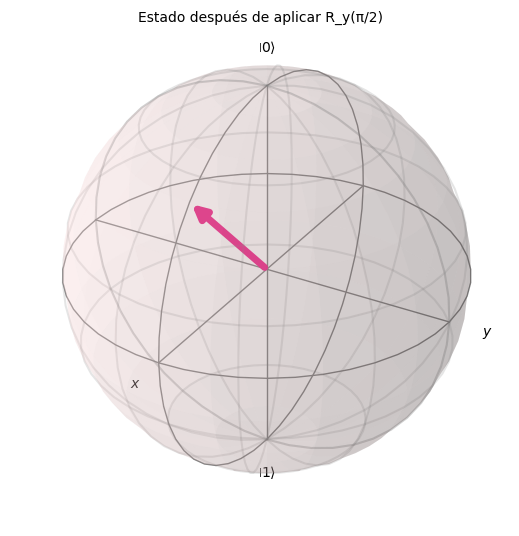

In [117]:
plot_bloch_vector([np.sin(np.pi/4), 0, np.cos(np.pi/4)], title="Estado después de aplicar R_y(π/2)")

### **4.3 Rotación en el eje Z: $R_z$**

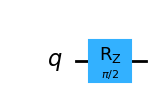

In [120]:
# Crear un circuito cuántico con 1 qubit
qc_rz = QuantumCircuit(1)

# Aplicar una rotación de π/2 en el eje Z
qc_rz.rz(np.pi/2, 0)

# Dibujar el circuito
qc_rz.draw('mpl')

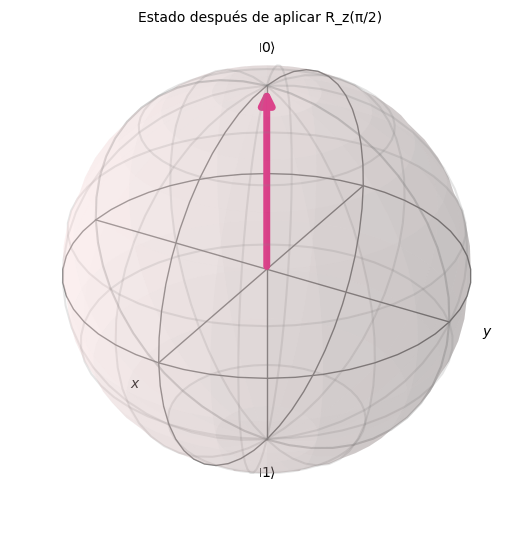

In [122]:
plot_bloch_vector([0, 0, 1], title="Estado después de aplicar R_z(π/2)")

## **5. Ejecución y medición en el simulador**
Ahora ejecutamos los circuitos en el **simulador cuántico** para ver los efectos en la medición.

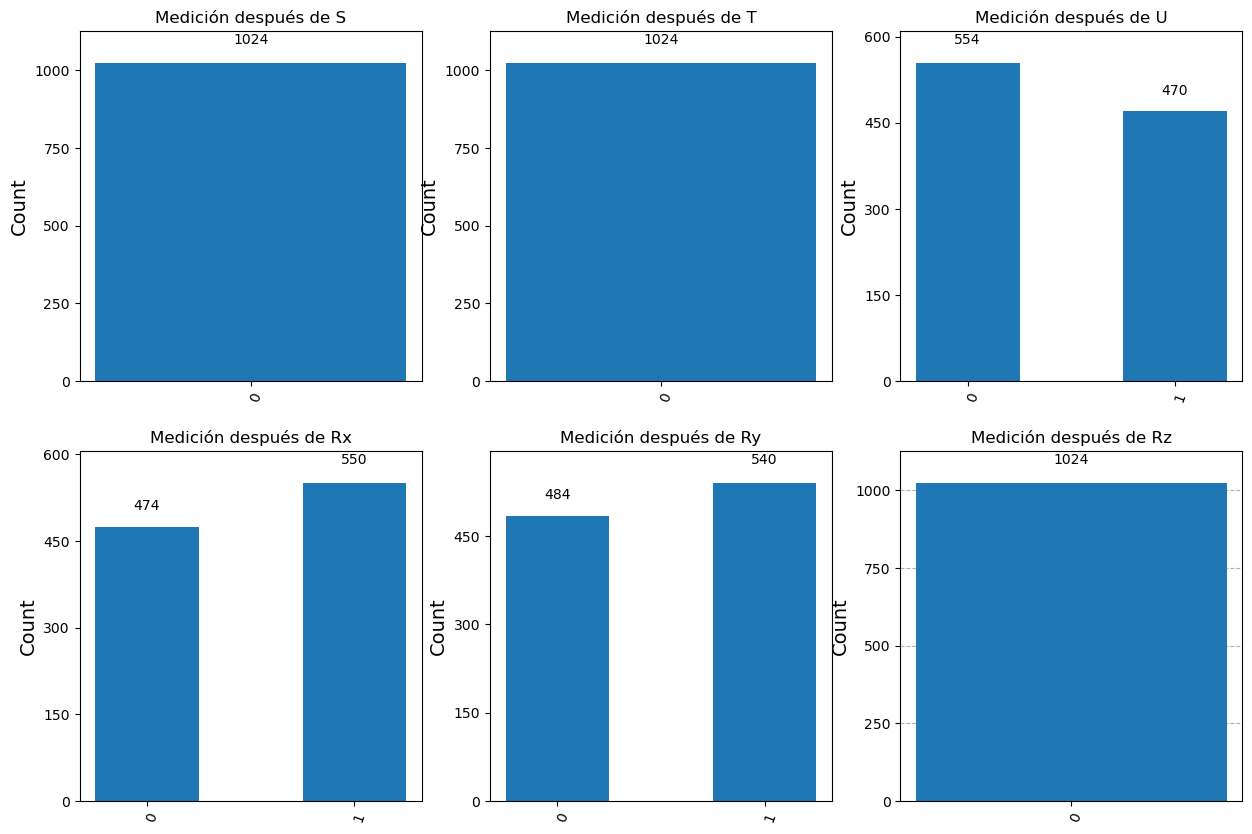

In [125]:
# Configurar el simulador cuántico
simulator = Aer.get_backend('aer_simulator')

# Ejecutar todas las mediciones
circuits = [qc_s, qc_t, qc_u, qc_rx, qc_ry, qc_rz]
labels = ["S", "T", "U", "Rx", "Ry", "Rz"]
results = []

for qc in circuits:
    qc.measure_all()
    transpiled_qc = transpile(qc, simulator)
    job = simulator.run(transpiled_qc, shots=1024)
    result = job.result()
    counts = result.get_counts(qc)
    results.append(counts)

# Visualizar histogramas
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for i, ax in enumerate(axes.flatten()):
    plot_histogram(results[i], ax=ax)
    ax.set_title(f"Medición después de {labels[i]}")

plt.show()

## **📌 Conclusión**  
✅ **Puertas de fase (S y T)**: Cambian la fase de $|1\rangle$ sin alterar la probabilidad de medición.  
✅ **Puerta U**: La transformación más general para un solo qubit.  
✅ **Rotaciones ($R_x, R_y, R_z$)**: Permiten rotar el qubit en la esfera de Bloch.  
✅ **Simulación y medición**: Confirmamos cómo estas puertas afectan el comportamiento de los qubits.  

📌 **¡Con esto terminamos el Laboratorio 2! 🚀**